In [475]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import root , bisect, newton, root_scalar


In [476]:
F = 12.2
Tau = 0.892
Sigma = 41.56
E_0 = 2409
T_c = 27.7
D_c = 291


In [477]:
newton(lambda x : (x-3)**2 ,4)

3.0000000158161653

In [478]:
energy  = lambda t : E_0 / ( F**2 * Tau**2) - (1 - Sigma/(F**2 * Tau))*t/Tau - np.exp(-t/Tau)+1

In [479]:
def bisetion(a,b,func, eps=10**(-5)):
    print(func(a),func(b))
    if func(a)*func(b) < 0:
        c = (a+b)/2
        c_list = [c]
        while abs(func(c)) > eps:
            if func(a)*func(c) < 0 :
                b = c
            elif func(a)*func(c) > 0 :
                a = c
            else:
                return 'test'
            c = (a+b)/2
            c_list.append(c)
        return c , func(c), np.array(c_list)
    return 'test2'

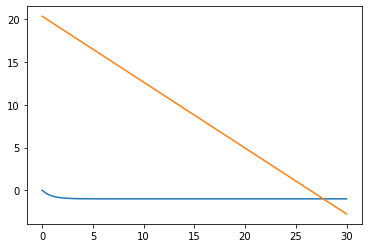

In [480]:
t = np.linspace(0,30,100)

sns.lineplot(x=t,y= np.exp(-t/Tau)-1 )
sns.lineplot(x=t,y=E_0 / ( F**2 * Tau**2) - (1 - Sigma/(F**2 * Tau))*t/Tau)

In [481]:
t_c  =bisetion(10,60,energy)[0]
print(t_c)

13.640278634794086 -24.866790317414498
27.711400985717773


In [482]:
distance = lambda T : F * Tau ** 2 * ( T / Tau - 1 + np.exp(- T / Tau))

In [483]:
distance_c = distance(t_c)
print(distance_c)
print(distance(T_c))

291.8594492869754
291.7353792000003


In [503]:
def max_distance_in_time(t):
    if Sigma/ (F**2 * Tau ) >= 1 :
        raise ValueError
    energy  = lambda t : E_0 / ( F**2 * Tau**2) - (1 - Sigma/(F**2 * Tau))*t/Tau - np.exp(-t/Tau)+1
    t_c  =newton(energy,3)

    if t <= t_c:
        return F * Tau ** 2 * ( t / Tau - 1 + np.exp(- t / Tau))
    
    # velocity_equation = lambda v : (E_0 + F * Tau * v + (F**2 * Tau **2 - v**2)* np.log(1 - v/(F * Tau)))/(v**2 - Sigma * Tau) - t / Tau -1/2 * np.log(1/4)*(1 - Sigma * Tau / v**2)
    velocity_equation = lambda v : (E_0 + F * Tau * v + (F *Tau - v) * (F *Tau + v)* np.log(1 - v/(F * Tau)))/(v**2 - Sigma * Tau) - t / Tau -1/2 * np.log(1/4)*(1 - Sigma * Tau / v**2)
    v = bisect(velocity_equation, 1,8,xtol=4*np.finfo(float).eps)
    print(v, velocity_equation(v))
    v = root_scalar(velocity_equation, x0 = v, x1 = 9).root
    print(v, velocity_equation(v))
    t_1 =  - Tau * np.log(1 - v / ( F * Tau ) )
    print(t_1, "t_1")
    t_2 = (E_0 + F * Tau * v + (F**2 * Tau **2 - v**2)* np.log(1 - v/(F * Tau)))/(v**2 - Sigma * Tau) * Tau
    t_2_2 = (1/2 * v**2 + F * ( -t_1 - 1/2 *t_1 **2 - 3 * np.log(1 - t_1)) - v**2 * t_1 / Tau - E_0)/ ( Sigma - v**2 / Tau)
    print(t_2 , "t_2", t_2_2 , "t_2_2")
    k = np.sqrt(1 + (v**2 / (Sigma* Tau) -1 ) * np.exp(2*(t_2 - t)/Tau))
    print(k, "k")
    distance_1 = F * Tau**2 * ( t_1/ Tau - 1 + np.exp(-t_1 / Tau))
    print(distance_1)
    distance_2 =  v * (t_2 - t_1)
    print(distance_2)
    distance_3 = F * Tau**2 *( 1 - np.exp(-t_1 / Tau)) + Tau * np.sqrt(Sigma * Tau ) / 2 * (np.log((v-np.sqrt(Sigma * Tau))/ (v + np.sqrt(Sigma * Tau))) - 2 * k - np.log((k-1)/(k+1)))
    print(distance_3)
    return distance_1 + distance_2 + distance_3 
    
    
    

In [504]:
max_distance_in_time(180)

ValueError: f(a) and f(b) must have different signs

In [486]:
v = 6.088638599883552
t =30
velocity_equation = lambda v : (E_0 + F * Tau * v + (F**2 * Tau **2 - v**2)* np.log(1 - v/(F * Tau)))/(v**2 - Sigma * Tau) - t / Tau -1/2 * np.log(1/4)*(1 - Sigma * Tau / v**2)
velocity_equation(6.088638599883552)

-298919664384893.94

In [487]:
root_scalar(velocity_equation,bracket=(1,7))

      converged: True
           flag: 'converged'
 function_calls: 55
     iterations: 54
           root: 6.088638599885753

In [488]:
np.log(1 - v/(F * Tau))

-0.8198314410857104

In [489]:
Sigma

41.56

In [490]:
(E_0 + F * Tau * v + (F**2 * Tau **2 - v**2)* np.log(1 - v/(F * Tau)))

2408.5615238251394

In [491]:
v**2 - Sigma * Tau

-8.057554623519536e-12

In [492]:
np.log(1 - v/(F * Tau))

-0.8198314410857104

In [493]:
max_distance_in_time(10)

99.11703051590186

c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


(6.2, 9)

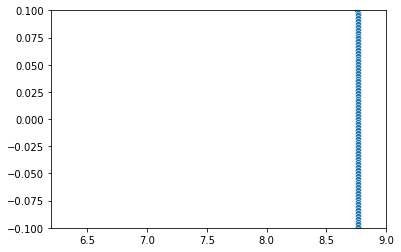

In [494]:
velocity_equation = lambda v : (E_0 + F * Tau * v + (F**2 * Tau **2 - v**2)* np.log(1 - v/(F * Tau)))/(v**2 - Sigma * Tau) - 55 / Tau -1/2 * np.log(1/4)*(1 - Sigma * Tau / v**2)
v_t = np.linspace(0.5 , 100,1000000)
sns.scatterplot(x=v_t , y= velocity_equation(v_t))
plt.ylim((-0.1,0.1))
plt.xlim((6.2,9))

6 -2449.3026314186013 6.12 6089.179820956809


c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


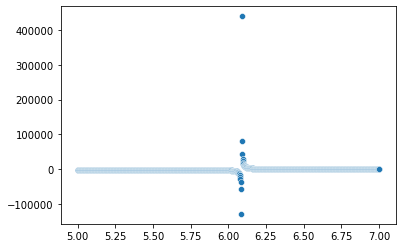

In [506]:
t = 180 
func = lambda v: (E_0 + F * Tau * v + (F *Tau - v) * (F *Tau + v)* np.log(1 - v/(F * Tau)))/(v**2 - Sigma * Tau) - t / Tau -1/2 * np.log(1/4)*(1 - Sigma * Tau / v**2)

sns.scatterplot(np.linspace(5,7,1000), func(np.linspace(5,7,1000)))
print("6", func(6), "6.12" , func(6.12))

In [496]:
4*np.finfo(float).eps

8.881784197001252e-16

In [507]:
time = lambda sigma , d :   1 / (2 * sigma) *(np.sqrt(E_0 + 4 *sigma *d**2 / Tau) - E_0 )

c:\Users\mkarc\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


26.890353175855306

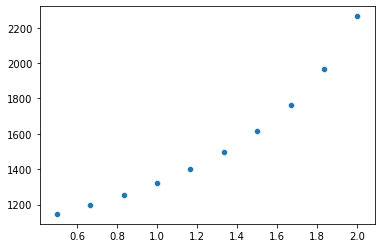

In [517]:
new_sigma = np.linspace(0.5,2,10) * Sigma
sns.scatterplot((new_sigma / Sigma)[::-1], time(new_sigma, 10000))

time(Sigma, 10000) / 60 

In [512]:
Sigma

41.56